# PROBLEM STATEMENT


- In this project, we will build a simple machine learning model to convert from celsius to fahrenheit. 
- The equation is as follows: **T(°F) = T(°C) × 9/5 + 32**
- For Example, let's convert 0°C celsius temperature to Fahrenheit:  **(0°C × 9/5) + 32 = 32°F**



<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/7/70/Thermometer_CF.svg"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Convert Celsius to Fahrenheit [Image Source: https://commons.wikimedia.org/wiki/File:Thermometer_CF.svg]
  </td></tr>
</table>


# IMPORT LIBRARIES

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# IMPORT DATASETS

In [2]:
Temperature_df = pd.read_csv('Celsius to Fahrenheit.csv')
Temperature_df.reset_index(drop=True, inplace=True)

In [3]:
Temperature_df

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


In [4]:
Temperature_df.head(5)

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [5]:
Temperature_df.tail(10)

,Celsius,Fahrenheit
20,6,42.8
21,7,44.6
22,8,46.4
23,9,48.2
24,10,50.0
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [6]:
Temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [7]:
Temperature_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


# VISUALIZE DATASET

<AxesSubplot:xlabel='Celsius', ylabel='Fahrenheit'>

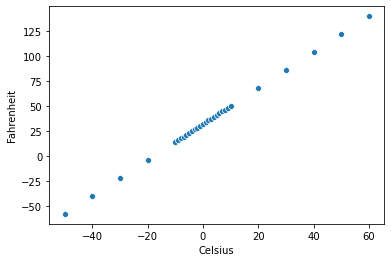

In [8]:
sns.scatterplot(Temperature_df['Celsius'], Temperature_df['Fahrenheit'])

# CREATE TESTING AND TRAINING DATASET

In [9]:
X_train = Temperature_df['Celsius']
y_train = Temperature_df['Fahrenheit']

# BUILD AND TRAIN THE MODEL

In [10]:
X_train.shape

(30,)

In [11]:
y_train.shape

(30,)

This will model a simple linear equation.

In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss='mean_squared_error')

In [15]:
epochs_hist = model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 971us/step - loss: 1123.2013
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 985.2646
Epoch 3/100
1/1 [==============================] - 0s 998us/step - loss: 1013.1875
Epoch 4/100
1/1 [==============================] - 0s 996us/step - loss: 981.9695
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 911.8337
Epoch 6/100
1/1 [==============================] - 0s 995us/step - loss: 863.8497
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 849.8747
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 838.9042
Epoch 9/100
1/1 [==============================] - 0s 998us/step - loss: 807.2853
Epoch 10/100
1/1 [==============================] - 0s 997us/step - loss: 763.1291
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 725.4022
Epoch 12/100
1/1 [==============================] - 0s 2ms/step - loss: 702.7316
Epoch 13/100
1/1 [=====

# EVALUATING THE MODEL 

In [16]:
epochs_hist.history.keys()

dict_keys(['loss'])

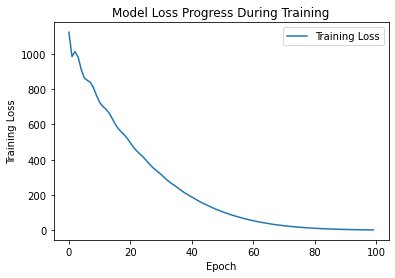

In [17]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [18]:
model.get_weights()

[array([[1.8059913]], dtype=float32), array([30.85845], dtype=float32)]

In [19]:
# Use the trained model to perform predictions

Temp_C = 0
Temp_F = model.predict([Temp_C])
print('Temperature in degF Using Trained ANN =', Temp_F)


Temperature in degF Using Trained ANN = [[30.85845]]


In [20]:
# Let's confirm this Using the equation: 
Temp_F = 9/5 * Temp_C + 32
print('Temperature in degF Using Equation =', Temp_F)


Temperature in degF Using Equation = 32.0


# Result After Tuning Hyperparameters:

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.3), loss='mean_squared_error')
epochs_hist = model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 0s/step - loss: 1.2939
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 45.4081
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 3.0536
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 10.0025
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 26.0823
Epoch 6/100
1/1 [==============================] - 0s 998us/step - loss: 19.5287
Epoch 7/100
1/1 [==============================] - 0s 998us/step - loss: 5.5449
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 0.1060
Epoch 9/100
1/1 [==============================] - 0s 997us/step - loss: 5.6845
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 12.4677
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 12.1309
Epoch 12/100
1/1 [==============================] - 0s 2ms/step - loss: 6.1840
Epoch 13/100
1/1 [==============================] 

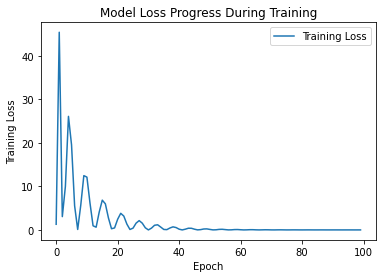

In [22]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])